# Used Cars Analysis Pipeline - Pandas
## 01. Data Profiling and Exploration

### Objectives:
1. Load and inspect the dataset
2. Generate automated profiling reports
3. Identify data quality issues
4. Understand data distributions
5. Detect missing values and outliers

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.pandas_utils import (
    load_dataset,
    print_dataset_summary,
    get_dataset_info,
    convert_to_datetime,
    load_config,
    detect_outliers_iqr
)

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported and project root added to path")

✅ Libraries imported and project root added to path


In [2]:
config_path = os.path.join(project_root, 'config', 'pipeline_config.yaml')
config = load_config(config_path)

full_raw_path = os.path.join(project_root, 'data', 'raw')
dataset_filename = config['datasets']['superstore']['filename']
full_file_path = os.path.join(full_raw_path, dataset_filename)

print(f"🔍 Attempting to load Superstore with Latin-1 encoding:\n{full_file_path}")

try:
    df = pd.read_csv(full_file_path, encoding='ISO-8859-1')
    print(f"✅ Successfully loaded {len(df):,} rows.")
    print_dataset_summary(df, "Global Superstore Sales")
except Exception as e:
    df = None
    print(f"❌ Load failed: {e}")

🔍 Attempting to load Superstore with Latin-1 encoding:
C:\Users\Administrator\Documents\Luxdev\used-cars-analysis-pipeline\data\raw\superstore_final_dataset.csv
✅ Successfully loaded 9,800 rows.

GLOBAL SUPERSTORE SALES SUMMARY

📊 Dimensions:
   • Rows: 9,800
   • Columns: 18
   • Memory: 9.93 MB

🔢 Data Types:
   • object: 15 columns
   • float64: 2 columns
   • int64: 1 columns

❌ Missing Data:
   • Total missing cells: 11
   • Missing percentage: 0.01%

🔄 Duplicates:
   • Duplicate rows: 0

📋 Column Categories:
   • Numeric: 3
   • Categorical: 15




In [3]:
if df is not None:
    print("📋 First 10 rows:")
    display(df.head(10))
    print("\n📊 Dataset Information:")
    df.info()
    print("\n📈 Statistical Summary:")
    display(df.describe())
else:
    print("❌ DataFrame is empty. Please check the file path above.")

📋 First 10 rows:


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


❌ Missing Values Analysis:
     Column  Missing_Count  Missing_Percentage
Postal_Code             11            0.112245


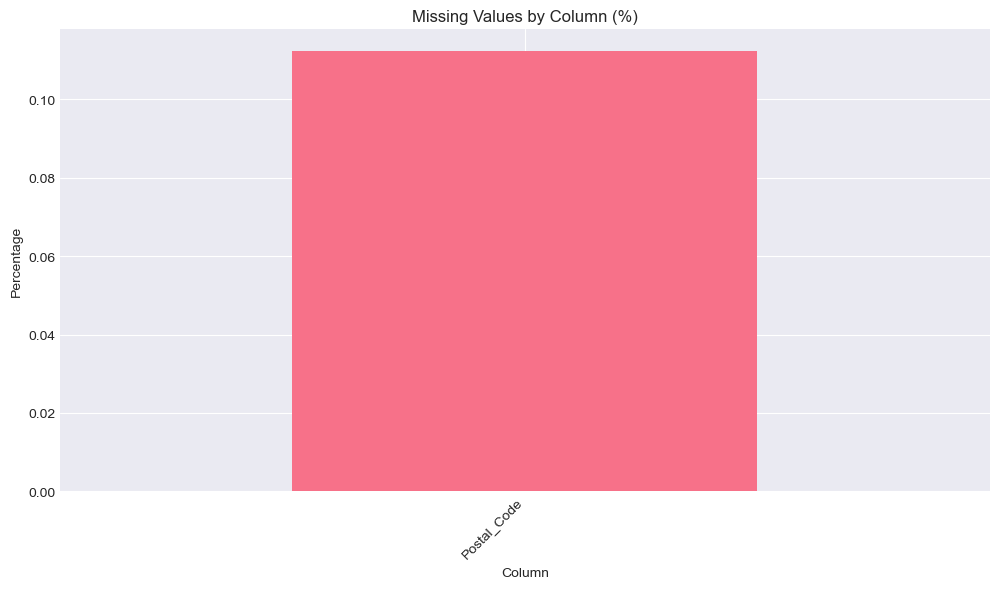

In [4]:
if df is not None:
    print("❌ Missing Values Analysis:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({'Column': missing.index, 'Missing_Count': missing.values, 'Missing_Percentage': missing_pct.values})
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    
    print(missing_df.to_string(index=False))
    
    plt.figure(figsize=(12, 6))
    missing_df.plot(x='Column', y='Missing_Percentage', kind='bar', legend=False, ax=plt.gca())
    plt.title('Missing Values by Column (%)')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.show()

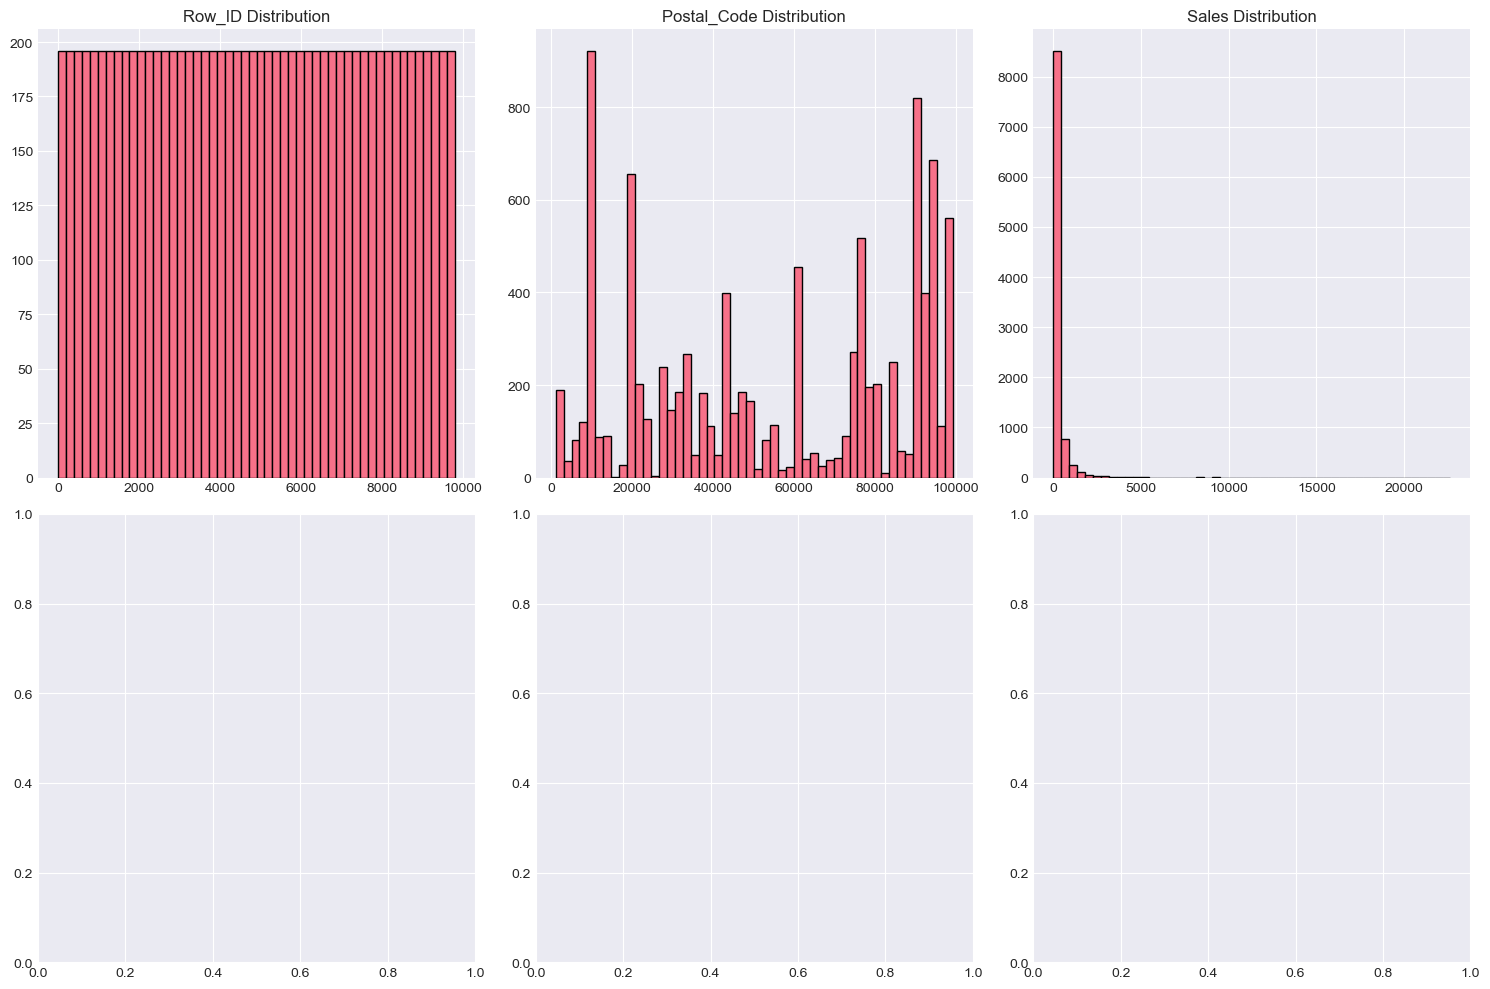

In [5]:
if df is not None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    for idx, col in enumerate(numeric_cols[:6]):
        df[col].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'{col} Distribution')
    plt.tight_layout()
    plt.show()


💰 Sales Analysis:


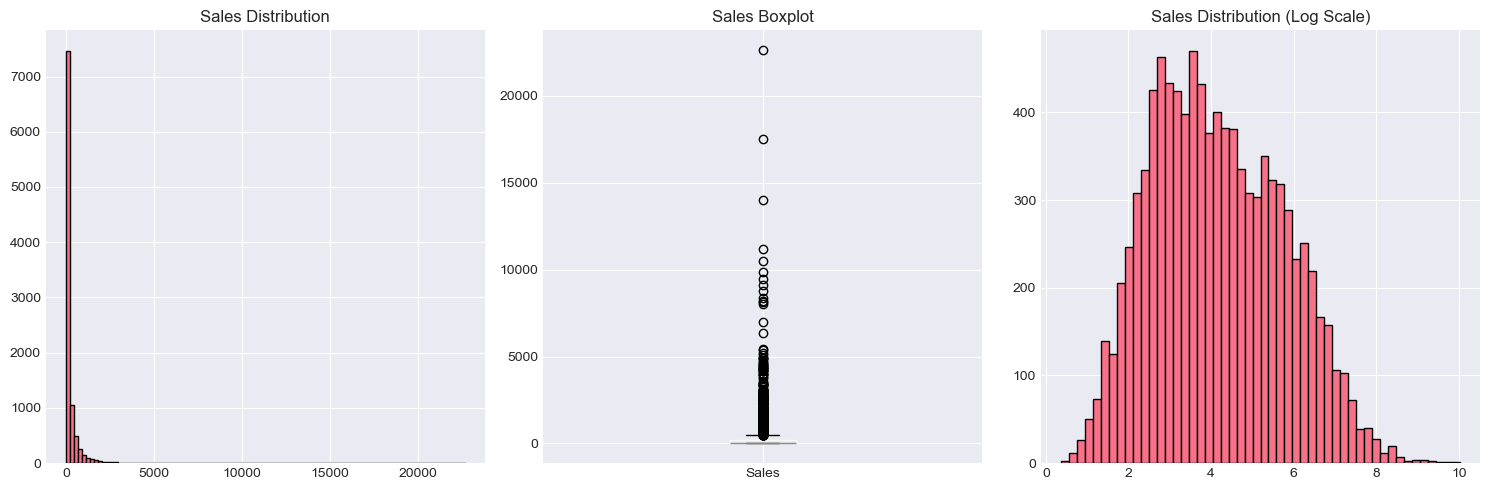

In [6]:
if df is not None:
    target_col = 'Sales' # Change this to 'Profit' if preferred
    
    if target_col in df.columns:
        print(f"\n💰 {target_col} Analysis:")
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        df[target_col].hist(bins=100, ax=axes[0], edgecolor='black')
        axes[0].set_title(f'{target_col} Distribution')
        
        df.boxplot(column=target_col, ax=axes[1])
        axes[1].set_title(f'{target_col} Boxplot')
        
        df[df[target_col] > 0][target_col].apply(np.log1p).hist(bins=50, ax=axes[2], edgecolor='black')
        axes[2].set_title(f'{target_col} Distribution (Log Scale)')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"❌ Column '{target_col}' not found in this dataset.")


In [7]:
if df is not None:
    print("\n📊 Outlier Detection (IQR Method):")
    # Superstore columns are usually 'Sales', 'Quantity', 'Profit', 'Discount'
    cols_to_check = [c for c in ['Sales', 'Quantity', 'Profit'] if c in df.columns]
    
    for col in cols_to_check:
        detect_outliers_iqr(df, col)



📊 Outlier Detection (IQR Method):
Outliers in 'Sales':
   • Range: [-272.79, 500.64]
   • Count: 1145 (11.68%)


In [8]:
if df is not None:
    print("\n" + "="*70 + "\nPROFILING SUMMARY\n" + "="*70)
    info = get_dataset_info(df)
    print(f"✅ Total records: {info['shape'][0]:,}")
    print(f"📊 Missing data: {info['missing_percentage']:.2f}%")
    print(f"🔄 Duplicates: {info['duplicate_rows']:,}")


PROFILING SUMMARY
✅ Total records: 9,800
📊 Missing data: 0.01%
🔄 Duplicates: 0
